In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Roboto Slab'
import seaborn as sns
import os
import numpy as np
%matplotlib inline

In [2]:
files = [f for f in os.listdir('./') if f.endswith('.csv')]

In [3]:
parvals = [f.split('/')[-1].strip('.csv').replace('n', '-').split('_') for f in files]

In [4]:
rhovals, lamvals = zip(*[(float(a), float(b)) for a,b in parvals])

In [5]:
sorted_parvals = np.array(parvals)[np.lexsort(np.vstack((lamvals, rhovals)))]

In [6]:
files = ['./{}_{}.csv'.format(r.replace('-','n'),l.replace('-','n'))
        for r,l in sorted_parvals]

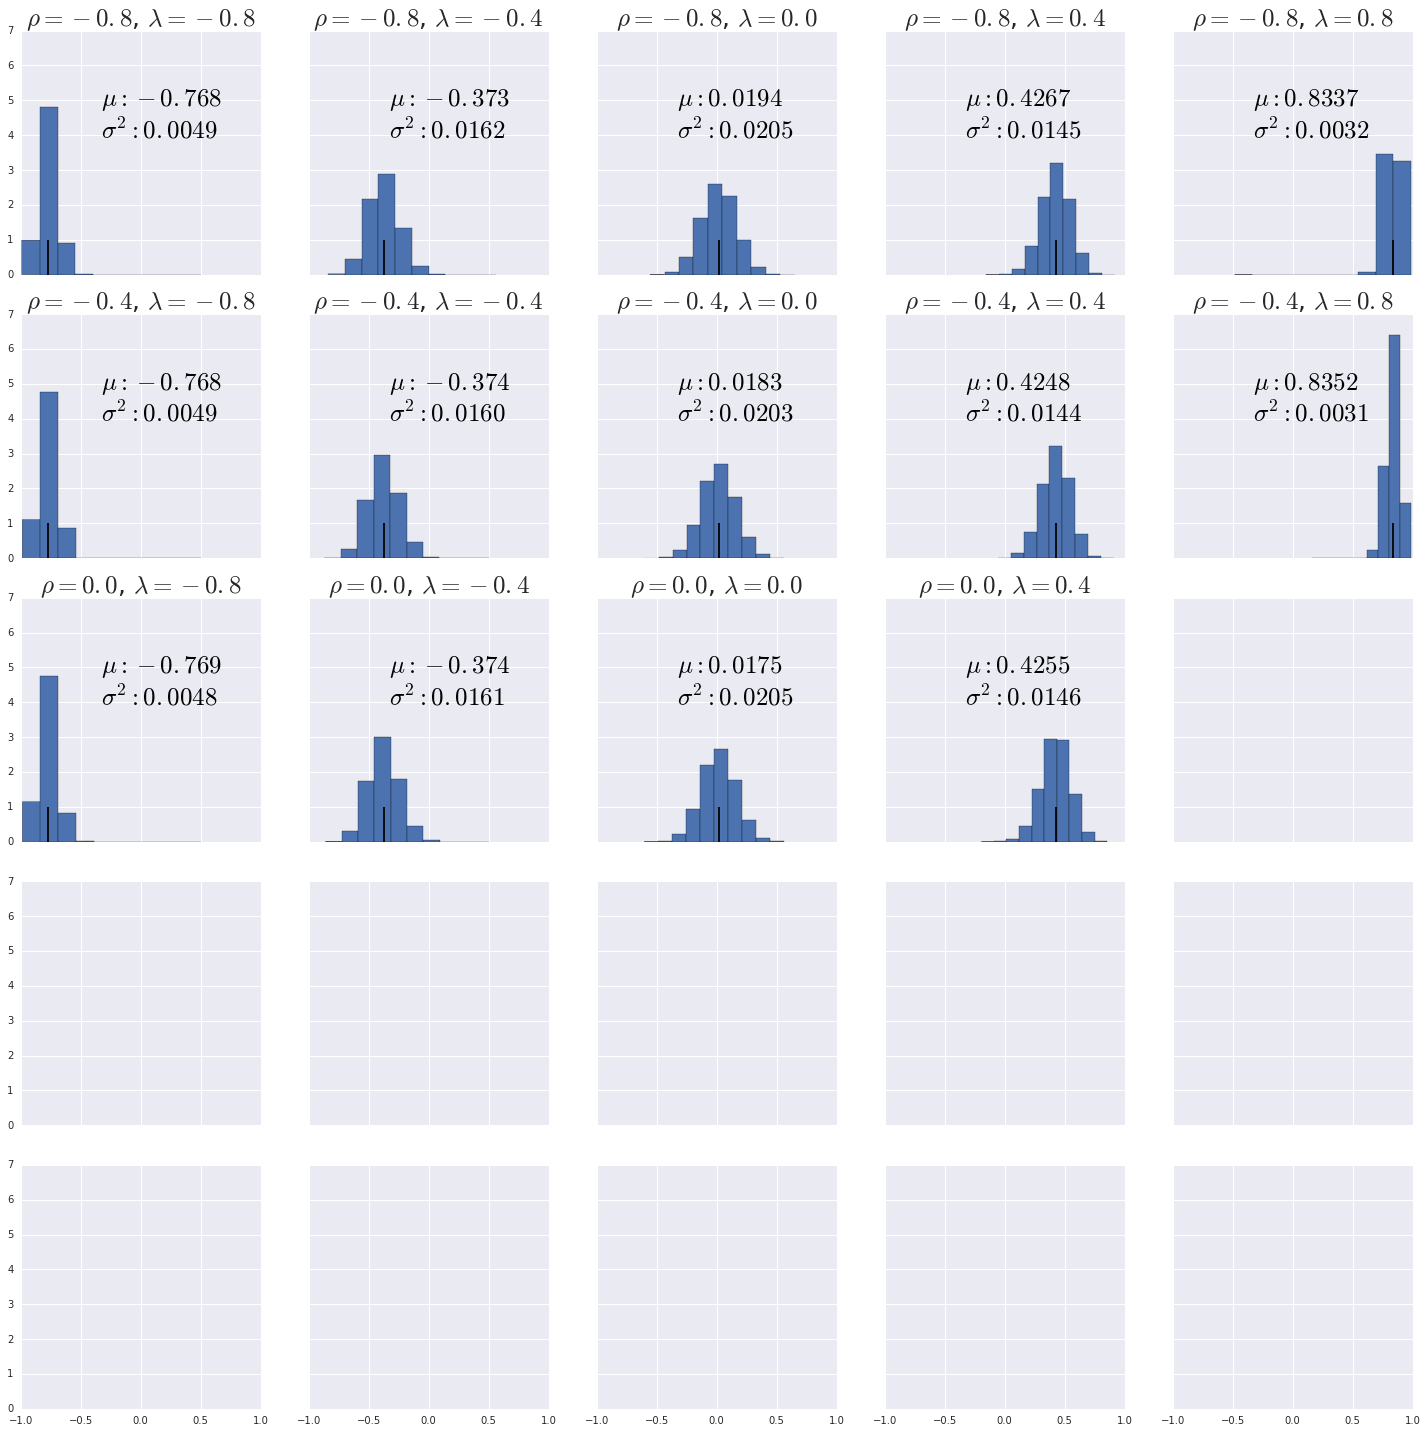

In [11]:
expsq = [-.8,-.4,0.,.4,.8] #runs a 5x5 grid, instead of the 9x9
fig,ax = plt.subplots(len(expsq),len(expsq), 
                       figsize=(20,20), sharex=True,sharey=True)
for f in files:
    fbase = f.split('/')[-1].strip('.csv')
    rhostr, lamstr = fbase.replace('n', '-').split('_')
    rhoval, lamval = float(rhostr), float(lamstr)
    if (rhoval not in expsq) or (lamval not in expsq):
        continue
    i,j = expsq.index(rhoval), expsq.index(lamval)
    df = pd.read_csv(f)

    ax[i,j].hist(df['lambda'].values, normed=True)
    ax[i,j].vlines(df['lambda'].mean(), 0,1)

    tstring = '$\\rho = {}$, $\\lambda = {}$'.format(rhostr, lamstr)
    ax[i,j].set_title(tstring,fontsize=25)
    m,v = df['lambda'].mean(), df['lambda'].var()
    m,v = str(m)[0:6], str(v)[0:6]
    ax[i,j].text(-.33,4,'$\\mu: {}$\n$\\sigma^2:{}$'.format(m,v),color='k',fontsize=25)
plt.tight_layout()
plt.show()

./n0.8_n0.8.csv : -0.7686361436385638 	(0.004921863127224328)


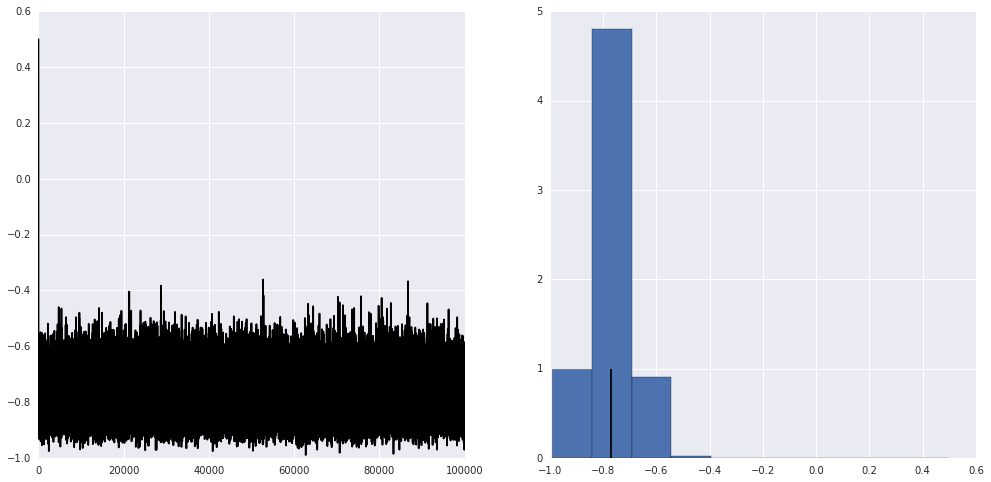

./n0.8_n0.4.csv : -0.3733206667933321 	(0.01622986020177938)


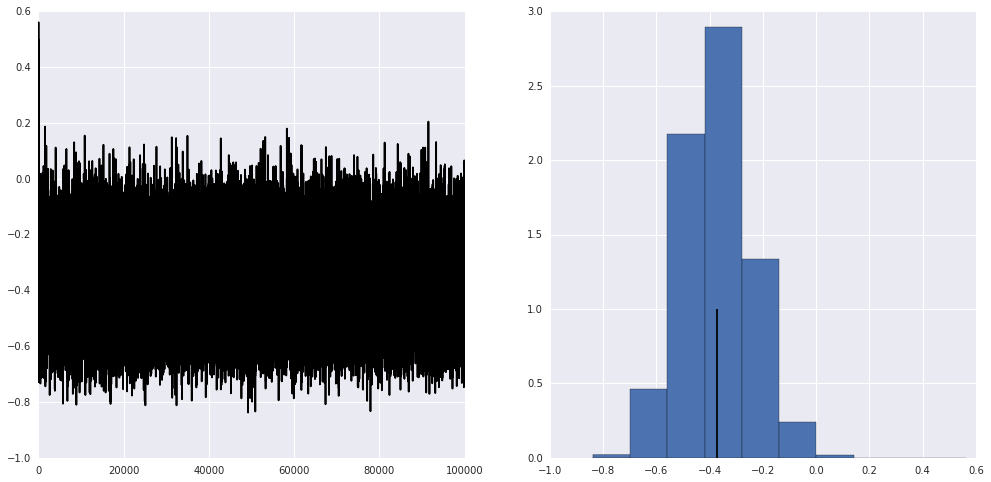

./n0.8_0.0.csv : 0.019487145128548718 	(0.020587333917250625)


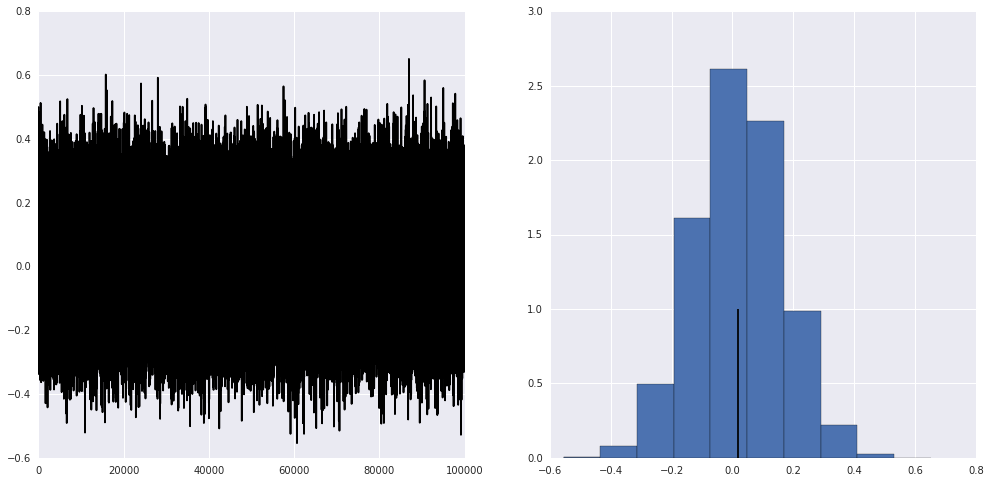

./n0.8_0.4.csv : 0.42678216217837817 	(0.014543247646208936)


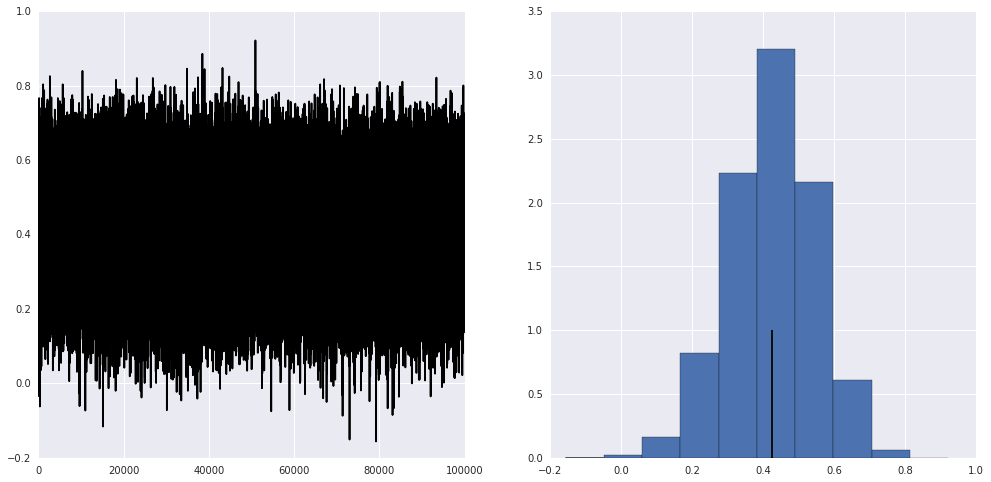

./n0.8_0.8.csv : 0.8337227027729724 	(0.0032139030254789446)


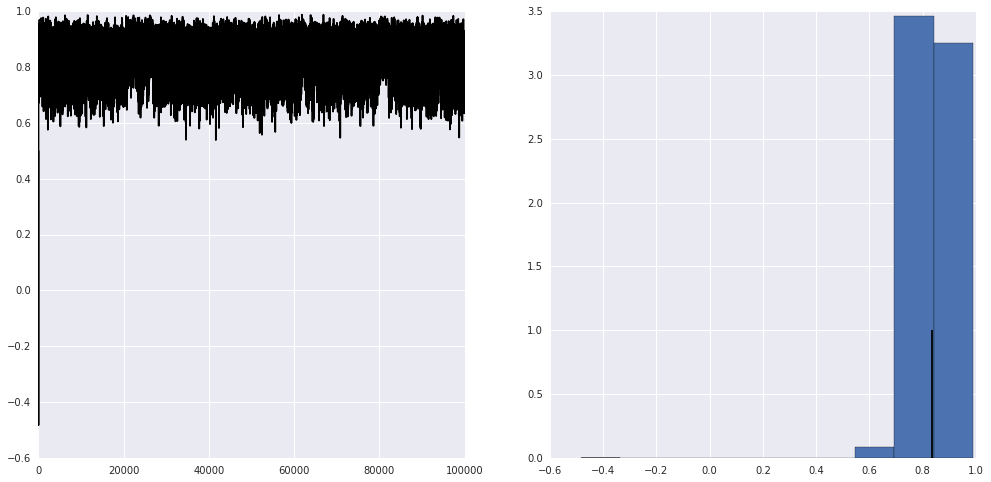

./n0.4_n0.8.csv : -0.7687376126238739 	(0.004969465322176378)


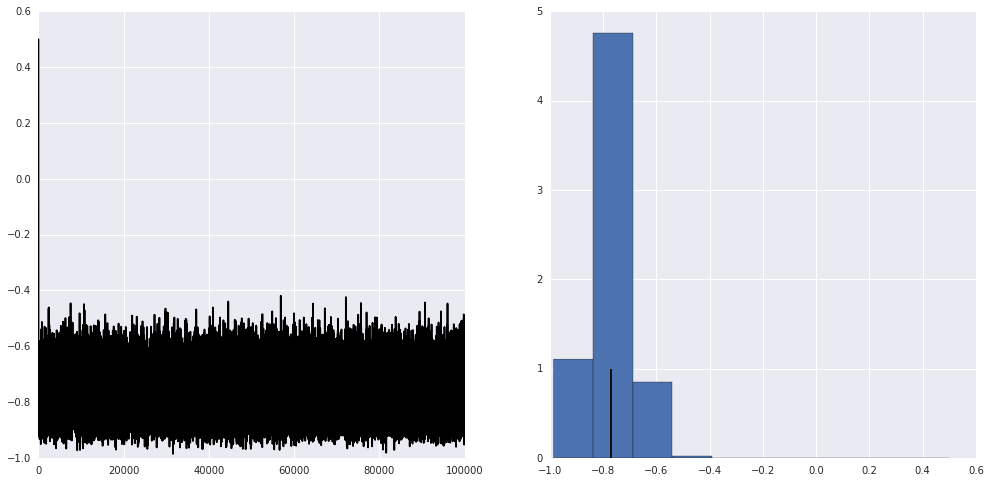

./n0.4_n0.4.csv : -0.3743326766732333 	(0.01609862490512435)


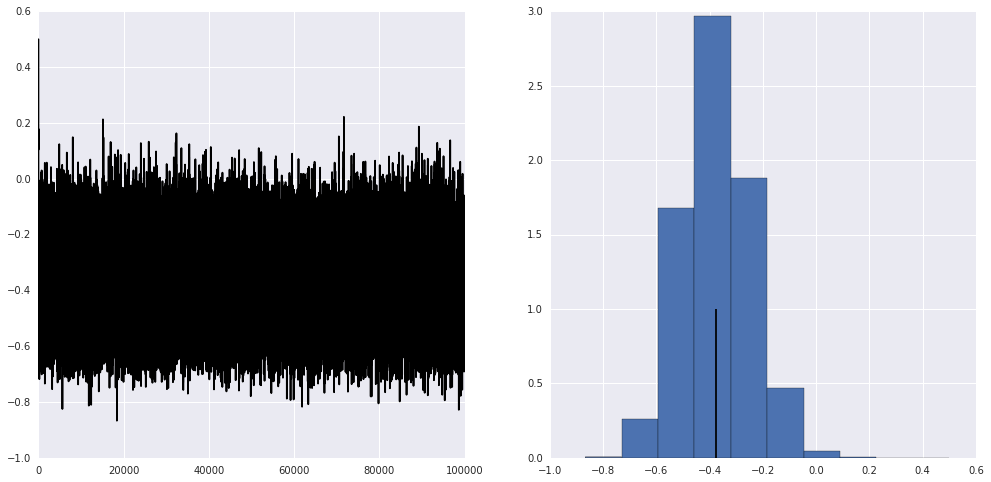

./n0.4_0.0.csv : 0.018393806061939383 	(0.020323231265234748)


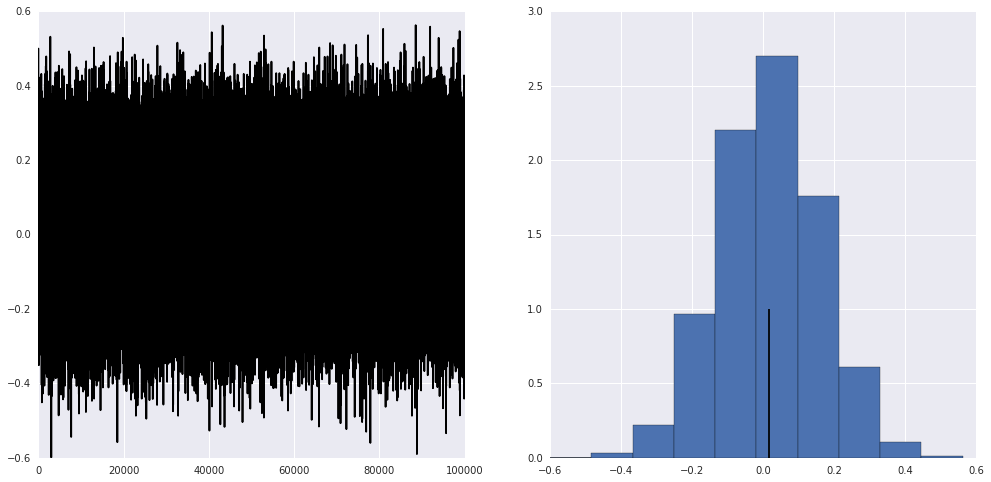

./n0.4_0.4.csv : 0.42481536184638147 	(0.014445472228411319)


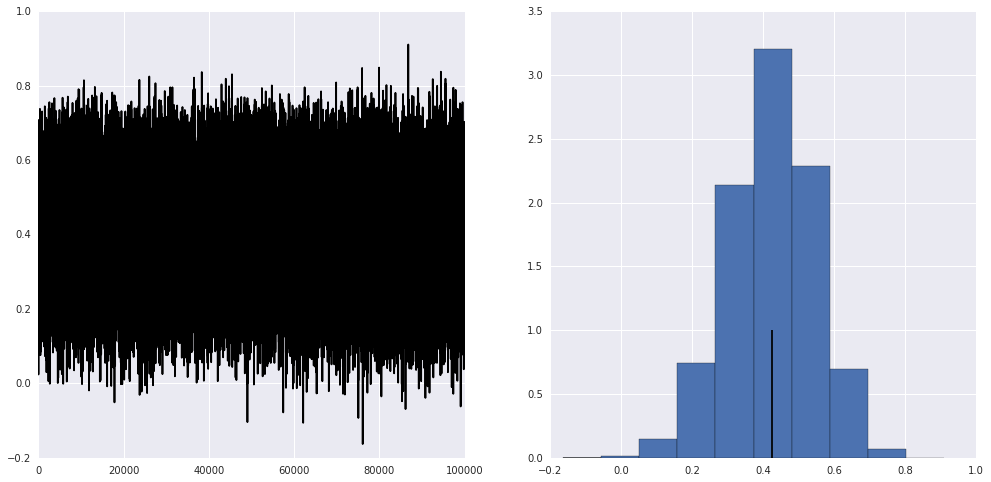

./n0.4_0.8.csv : 0.8352253077469226 	(0.0031693102059115416)


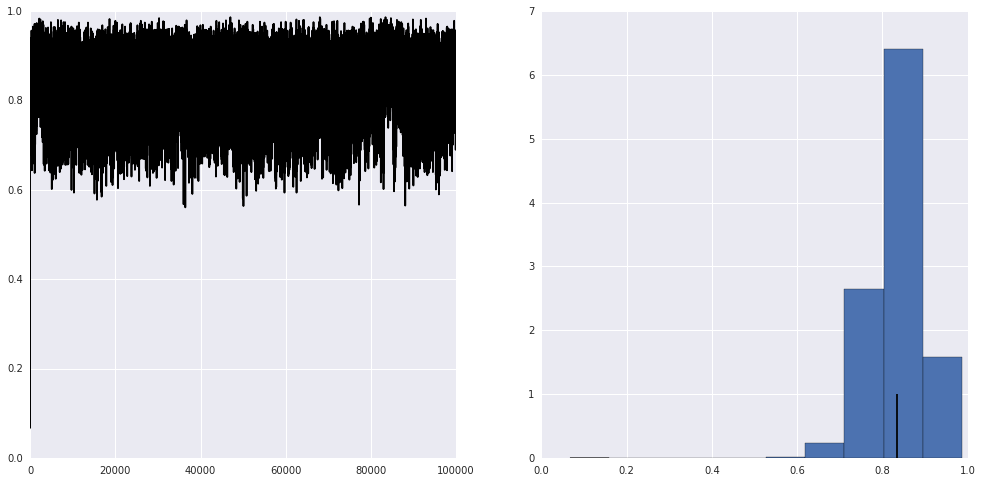

./0.0_n0.8.csv : -0.7696575634243656 	(0.00488944359601904)


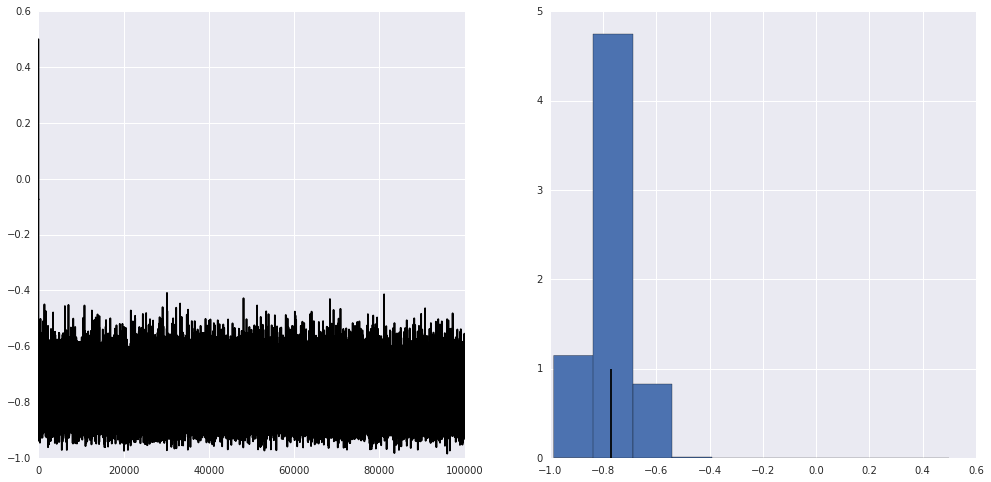

./0.0_n0.4.csv : -0.374970710292897 	(0.016175745672104478)


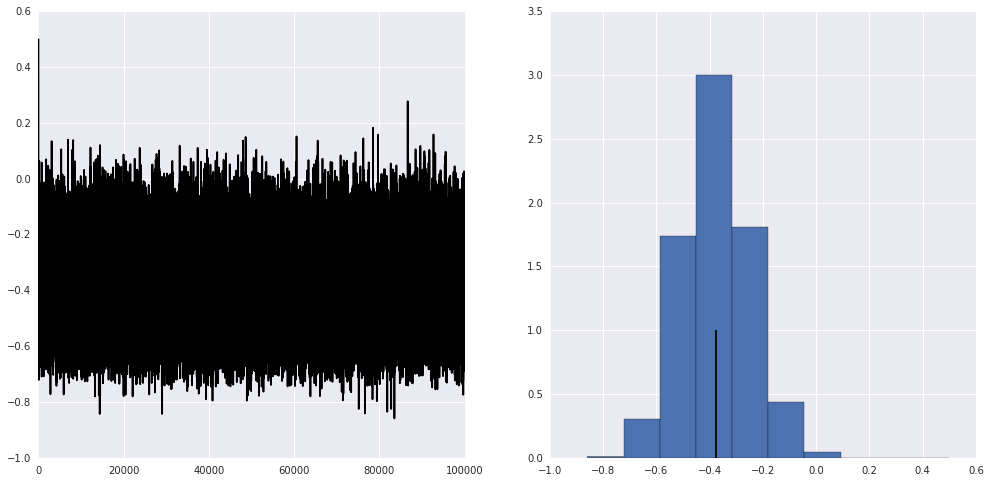

./0.0_0.0.csv : 0.01757514424855752 	(0.02051327573578544)


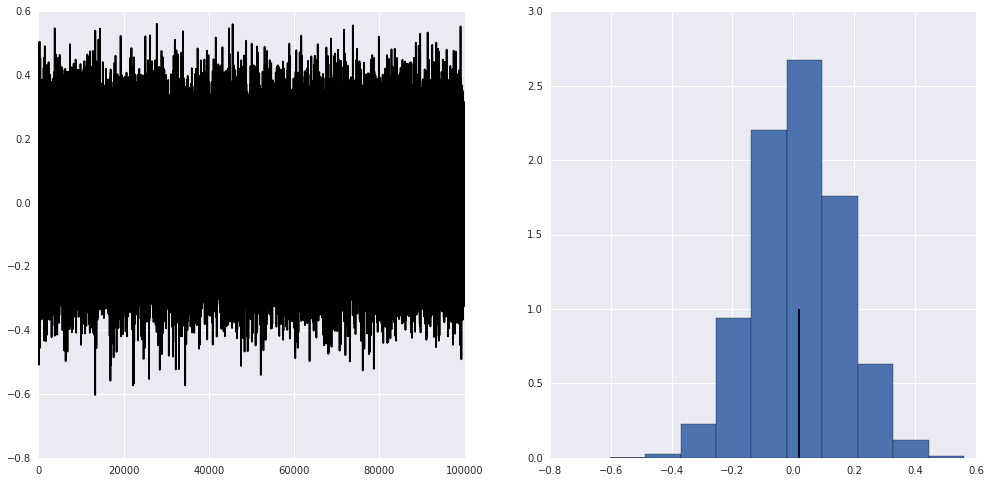

./0.0_0.4.csv : 0.4255694043059569 	(0.014626672705494143)


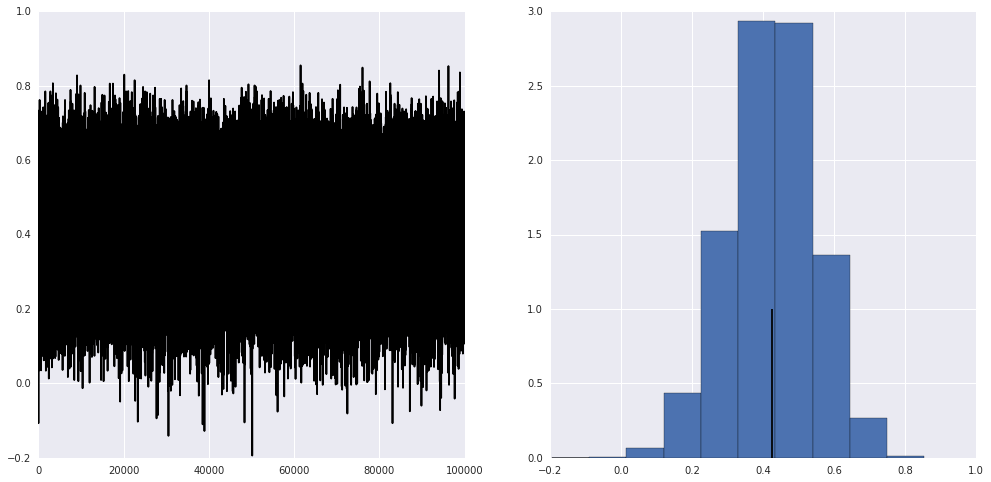

In [10]:
for f in files:
    df = pd.read_csv(f)
    fig, ax = plt.subplots(1,2, figsize=(2.1*8,8))
    ax[0].plot(df['lambda'].values, 'k')
    ax[1].hist(df['lambda'].values, normed=True)
    ax[1].vlines(df['lambda'].mean(), 0,1)
    print('{f} : {m} \t({v})'.format(f=f, m=df['lambda'].mean(), v=df['lambda'].var()))
    plt.show()